In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

In [202]:
data = pd.read_csv("df_hipflat_cleaned_01_gh.csv")

In [203]:
data.sample(5)


,name,latitude,longitude,price_sqm,change_last_q,change_last_y,rental_yield,change_last_y_rental_price,price_hist,district_cor,...,trans_dist_2,trans_type_3,trans_name_3,trans_dist_3,trans_type_4,trans_name_4,trans_dist_4,trans_type_5,trans_name_5,trans_dist_5
1544,The Pano,13.672910,100.541590,150012,6.6,-0.66,4.30,-0.37,"[{""date"":""2008-04-01"",""value"":85060},{""date"":""...",Khet Bang Kho Laem,...,3400,expressway,Sathu Pradit 1 Toll Plaza,3700,mrt,Khlong Toei,6300,bts,Chong Nonsi,6500
896,Le Monaco Residence Ari,13.787632,100.544128,150805,3.86,2.42,4.46,0,"[{""date"":""2012-01-01"",""value"":139655},{""date"":...",Khet Phaya Thai,...,1200,expressway,Khlong Prapa 1 Toll Plaza,1300,expressway,Yan Phahon Yothin Toll Plaza,1600,mrt,Kamphaeng Phet,1900
847,Tonson Court,13.739303,100.544423,80436,16.24,12.91,6.27,-40.68,"[{""date"":""2011-01-01"",""value"":75000},{""date"":""...",Khet Pathum Wan,...,900,expressway,Sukhumvit Toll Plaza,1100,expressway,Phetchaburi Toll Plaza,1600,bts,Ratchadamri,1700
67,Knightsbridge Skycity Saphanmai,13.887608,100.603908,110129,5.44,–,4.45,–,"[{""date"":""2018-04-01"",""value"":104443},{""date"":...",Khet Bang Khen,...,4900,expressway,Don Mueang 1 Toll Plaza,4900,mrt,Phahon Yothin,11000,mrt,Lat Phrao,12000
492,Garden Place,13.796146,100.576927,41176,0,18.18,8.77,36.82,"[{""date"":""2008-04-01"",""value"":27273},{""date"":""...",Khet Huai Khwang,...,870,mrt,Sutthisan,1100,expressway,Sutthisan Toll Plaza,2900,expressway,Din Daeng 1 Toll Plaza Don Mueang Toll Way,3800


In [204]:
cat = len(data.select_dtypes(include=['object']).columns)
num = len(data.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  31 categorical + 41 numerical = 72 features


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 72 columns):
name                          1550 non-null object
latitude                      1550 non-null float64
longitude                     1550 non-null float64
price_sqm                     1550 non-null int64
change_last_q                 1550 non-null object
change_last_y                 1550 non-null object
rental_yield                  1550 non-null float64
change_last_y_rental_price    1550 non-null object
price_hist                    1550 non-null object
district_cor                  1550 non-null object
year_built_imp_med            1550 non-null int64
buildings_cor                 1550 non-null int64
floors_cor_imp_med            1550 non-null int64
units_cor_imp_med             1550 non-null int64
shop_1                        1550 non-null object
shop_2                        1550 non-null object
shop_3                        1550 non-null object
shop_4                      

In [206]:
print(list(data))

['name', 'latitude', 'longitude', 'price_sqm', 'change_last_q', 'change_last_y', 'rental_yield', 'change_last_y_rental_price', 'price_hist', 'district_cor', 'year_built_imp_med', 'buildings_cor', 'floors_cor_imp_med', 'units_cor_imp_med', 'shop_1', 'shop_2', 'shop_3', 'shop_4', 'shop_5', 'shop_1_dist', 'shop_2_dist', 'shop_3_dist', 'shop_4_dist', 'shop_5_dist', 'school_1', 'school_2', 'school_3', 'school_4', 'school_5', 'school_1_dist', 'school_2_dist', 'school_3_dist', 'school_4_dist', 'school_5_dist', 'res_1', 'res_2', 'res_3', 'res_4', 'res_5', 'res_1_dist', 'res_2_dist', 'res_3_dist', 'res_4_dist', 'res_5_dist', 'hospital_dist', 'Elevator', 'Parking', 'Security', 'CCTV', 'Pool', 'Sauna', 'Gym', 'Garden', 'Playground', 'Shop', 'Restaurant', 'Wifi', 'trans_type_1', 'trans_name_1', 'trans_dist_1', 'trans_type_2', 'trans_name_2', 'trans_dist_2', 'trans_type_3', 'trans_name_3', 'trans_dist_3', 'trans_type_4', 'trans_name_4', 'trans_dist_4', 'trans_type_5', 'trans_name_5', 'trans_dist_5'

In [207]:
# drop unused columns; price history, names of places
data.drop(['price_hist','change_last_q', 'change_last_y','change_last_y_rental_price',
           'shop_1', 'shop_2', 'shop_3', 'shop_4', 'shop_5',
           'school_1', 'school_2', 'school_3', 'school_4', 'school_5',
           'res_1', 'res_2', 'res_3', 'res_4', 'res_5',
           'trans_name_1', 'trans_name_2', 'trans_name_3','trans_name_4','trans_name_5'],axis=1,inplace=True)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 48 columns):
name                  1550 non-null object
latitude              1550 non-null float64
longitude             1550 non-null float64
price_sqm             1550 non-null int64
rental_yield          1550 non-null float64
district_cor          1550 non-null object
year_built_imp_med    1550 non-null int64
buildings_cor         1550 non-null int64
floors_cor_imp_med    1550 non-null int64
units_cor_imp_med     1550 non-null int64
shop_1_dist           1550 non-null int64
shop_2_dist           1550 non-null int64
shop_3_dist           1550 non-null int64
shop_4_dist           1550 non-null int64
shop_5_dist           1550 non-null int64
school_1_dist         1550 non-null int64
school_2_dist         1550 non-null int64
school_3_dist         1550 non-null int64
school_4_dist         1550 non-null int64
school_5_dist         1550 non-null int64
res_1_dist            1550 non-null int64
res

In [209]:
# convert transportation types to dummies bts-skytrain, mrt-subway, expressway)
data=pd.get_dummies(data,columns=['district_cor','trans_type_1', 'trans_type_2','trans_type_3', 'trans_type_4',  'trans_type_5'])


In [210]:
data.describe()

,latitude,longitude,price_sqm,rental_yield,year_built_imp_med,buildings_cor,floors_cor_imp_med,units_cor_imp_med,shop_1_dist,shop_2_dist,...,trans_type_2_mrt,trans_type_3_bts,trans_type_3_expressway,trans_type_3_mrt,trans_type_4_bts,trans_type_4_expressway,trans_type_4_mrt,trans_type_5_bts,trans_type_5_expressway,trans_type_5_mrt
count,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,...,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000
mean,13.748705,100.563505,104765.750323,6.572252,2007.841935,1.840645,18.409677,386.058065,851.426452,1124.273548,...,0.206452,0.346452,0.418065,0.235484,0.248387,0.576774,0.174839,0.225806,0.584516,0.189677
std,0.046520,0.046255,60734.898777,42.256093,8.359046,2.364964,12.780838,432.533345,657.793384,763.294596,...,0.404889,0.475993,0.493400,0.424438,0.432217,0.494230,0.379952,0.418247,0.492964,0.392172
min,13.637678,100.376483,397.000000,0.000000,1981.000000,1.000000,2.000000,1.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.719344,100.539796,66378.000000,4.190000,2005.000000,1.000000,8.000000,109.250000,380.000000,590.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.738789,100.566999,92435.500000,5.030000,2010.000000,1.000000,12.000000,220.000000,700.000000,930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,13.778623,100.588639,129887.500000,5.750000,2014.000000,2.000000,28.000000,499.500000,1100.000000,1500.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,13.921770,100.859832,679597.000000,1181.860000,2023.000000,53.000000,77.000000,3500.000000,6400.000000,6400.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Columns: 101 entries, name to trans_type_5_mrt
dtypes: float64(3), int64(38), object(1), uint8(59)
memory usage: 598.0+ KB


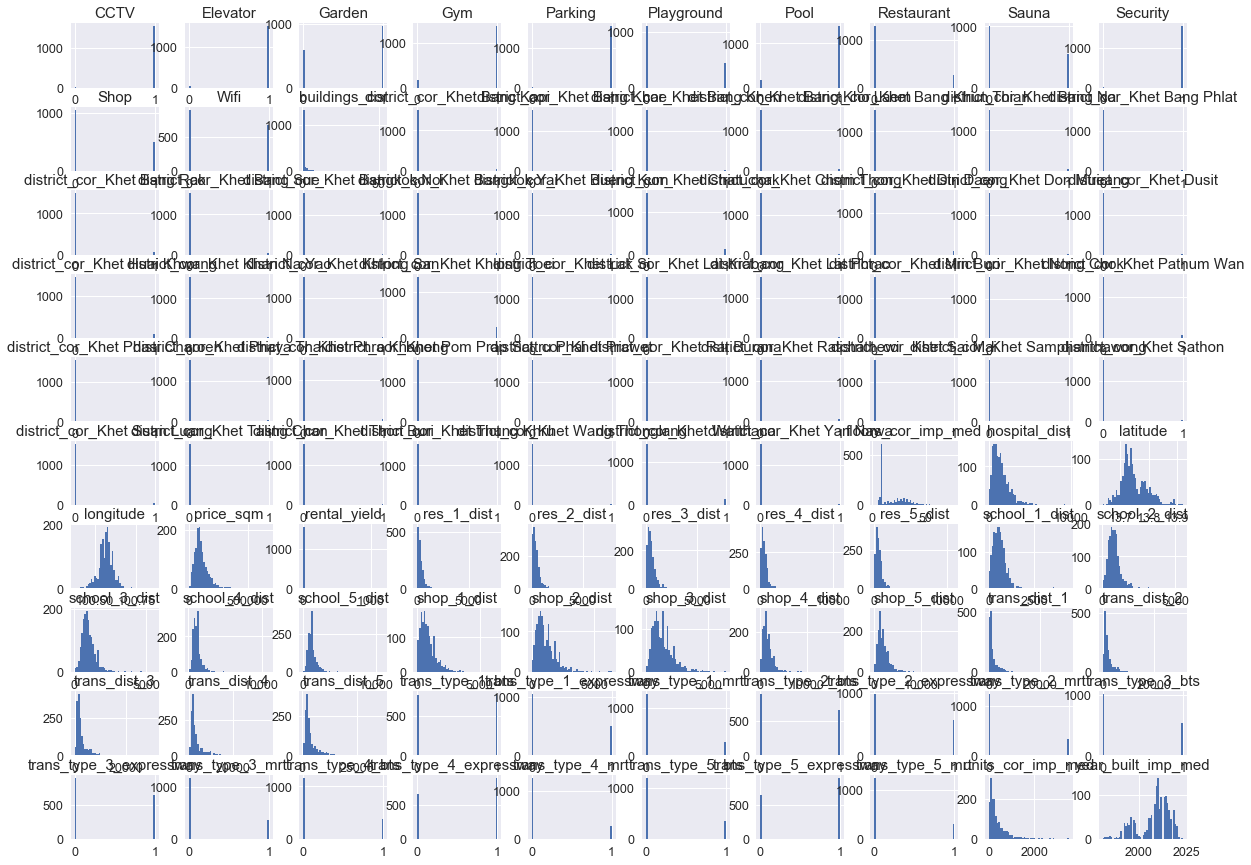

In [212]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

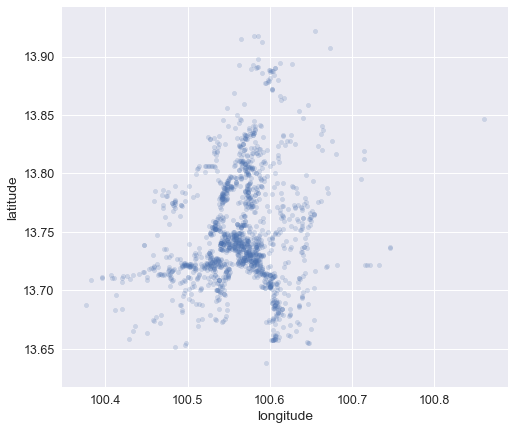

In [213]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,figsize=(8,7))
plt.savefig('lat-long map.png')

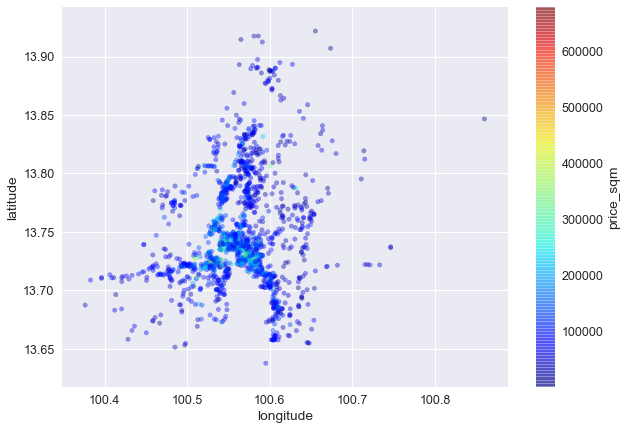

In [214]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="price_sqm", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('price-lat-long map.png')

Text(0.5,1,'Top 10 correlation between different features')

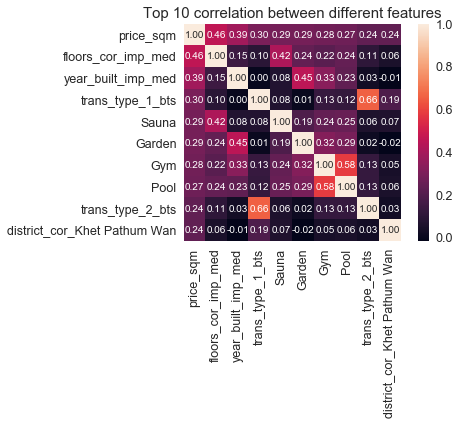

In [215]:
# Top 10 features - Heatmap
cols = corr_matrix.nlargest(10, "price_sqm")["price_sqm"].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Top 10 correlation between different features')

In [216]:
corr_matrix = data.corr()
corr_matrix["price_sqm"].sort_values(ascending=False)

price_sqm                           1.000000
floors_cor_imp_med                  0.463045
year_built_imp_med                  0.389274
trans_type_1_bts                    0.299027
Sauna                               0.286855
Garden                              0.286053
Gym                                 0.279602
Pool                                0.269606
trans_type_2_bts                    0.239500
district_cor_Khet Pathum Wan        0.238228
trans_type_3_bts                    0.237323
district_cor_Khet Watthana          0.228354
district_cor_Khet Khlong Toei       0.167666
district_cor_Khet Bang Rak          0.150053
district_cor_Khet Ratchathewi       0.149177
trans_type_4_expressway             0.134477
trans_type_5_expressway             0.121745
Playground                          0.115364
Wifi                                0.092006
Elevator                            0.088907
district_cor_Khet Sathon            0.076650
Security                            0.074493
district_c

In [217]:
# exclude everything with a price above or below 3 standard deviations (i.e. outliers)
df = data.copy()
df = df[np.abs(df["price_sqm"]-df["price_sqm"].mean())<=(3*df["price_sqm"].std())]

In [218]:
df.describe()

,latitude,longitude,price_sqm,rental_yield,year_built_imp_med,buildings_cor,floors_cor_imp_med,units_cor_imp_med,shop_1_dist,shop_2_dist,...,trans_type_2_mrt,trans_type_3_bts,trans_type_3_expressway,trans_type_3_mrt,trans_type_4_bts,trans_type_4_expressway,trans_type_4_mrt,trans_type_5_bts,trans_type_5_expressway,trans_type_5_mrt
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,...,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000
mean,13.748918,100.563665,100623.525591,6.655728,2007.711286,1.849738,18.053150,388.580052,857.890420,1131.721129,...,0.205381,0.340551,0.423228,0.236220,0.248031,0.574803,0.177165,0.223097,0.585302,0.191601
std,0.046835,0.046541,51354.017817,42.609678,8.339834,2.381339,12.418102,434.457273,659.093897,764.984564,...,0.404112,0.474050,0.494233,0.424899,0.432012,0.494535,0.381934,0.416460,0.492832,0.393690
min,13.637678,100.376483,397.000000,0.000000,1981.000000,1.000000,2.000000,1.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.718932,100.539783,65966.750000,4.267500,2004.000000,1.000000,8.000000,109.000000,390.000000,600.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.738884,100.567146,91766.500000,5.050000,2010.000000,1.000000,12.000000,223.500000,705.000000,940.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,13.779150,100.588928,127687.750000,5.770000,2014.000000,2.000000,28.000000,504.250000,1100.000000,1500.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,13.921770,100.859832,281703.000000,1181.860000,2023.000000,53.000000,74.000000,3500.000000,6400.000000,6400.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [219]:
df.isnull().values.any()

False

In [513]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet, BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [290]:
y = df.price_sqm
x = df.drop('price_sqm', axis = 1).drop('name',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 121)

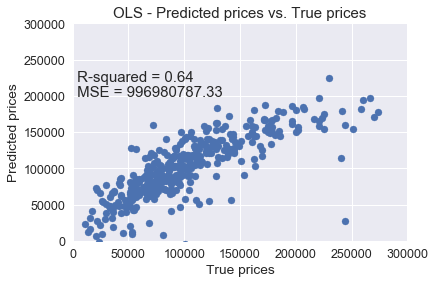

[0.68404125 0.62712499 0.5099522  0.72697593 0.56446071 0.51530362
 0.60844645 0.6195242  0.65029936 0.60938096]
0.6115509672719986


In [301]:
### Ordinary Least Squares (OLS) Regression

lm = LinearRegression()
lm.fit(x_train, y_train)
predicted = lm.predict(x_test)

plt.scatter(y_test, predicted)
plt.xlabel("True prices")
plt.ylabel("Predicted prices")
plt.axis([-1,300000,-1,300000])
plt.text(-1,220000, ' R-squared = {}'.format(round(float(lm.score(x_test,y_test)), 2)))
plt.text(-1,200000, ' MSE = {}'.format(round(float(mean_squared_error(y_test, predicted)), 2)))
plt.title('OLS - Predicted prices vs. True prices')
plt.show()

# print("Model coefficients: ", list(zip(list(x_test), lm.coef_)))

### 10 folds cross-validation along the previous OLS Regression

lm = LinearRegression()
shuffle = KFold(n_splits=10, shuffle=True, random_state=121)
cv_scores = cross_val_score(lm, x, y, cv=shuffle)
print(cv_scores)
print(cv_scores.mean())


In [488]:
# Cross-validation with k-folds

n_folds = 10

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=121)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    cv_scores = cross_val_score(model, x, y, cv=kf)
    
    plt.scatter(y_test, predicted)
    plt.title(model)
    plt.xlabel("True prices")
    plt.ylabel("Predicted prices")
    
    plt.text(-1,220000, ' R-squared = {}'.format(float(cv_scores.mean())))
    plt.text(-1,200000, ' R-squared Std = {}'.format(float(cv_scores.std())))
#    plt.text(-1,180000, ' MSE = {}'.format(round(float(mean_squared_error(y_test, predicted)), 2)))
    
    plt.show()
    return cv_scores,rmse

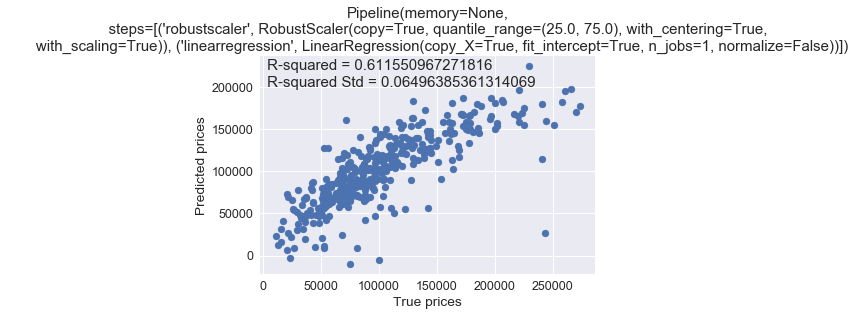


OLS: 0.6116 (0.0650)  RMS: 32446.96


In [502]:
ols = make_pipeline(RobustScaler(), LinearRegression())
score,rmse = rmse_cv(ols)
print("\nOLS: {:.4f} ({:.4f}) ".format(score.mean(), score.std()),'RMS: {:.2f}'.format(rmse.mean()))

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

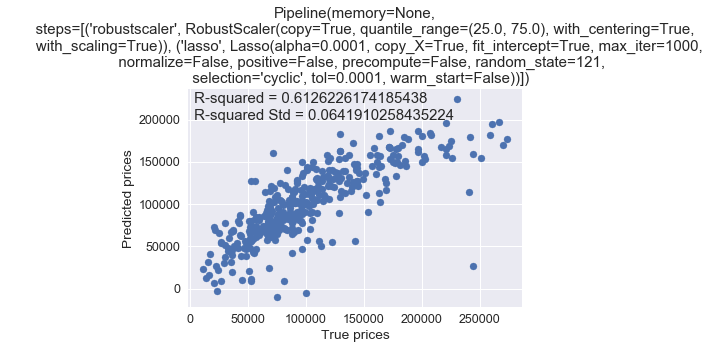


Lasso score: 0.6126 (0.0642) RMS: 32380.28


In [504]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0001, random_state=121))
score,rmse = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()),'RMS: {:.2f}'.format(rmse.mean()))

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\util

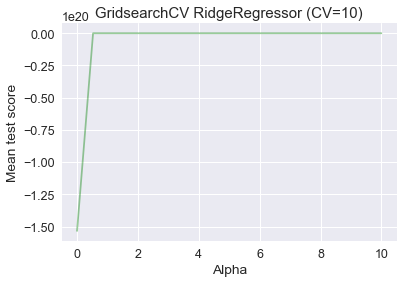

 Best-score = 0.45
 Optimal alpha = {'alpha': 6.842105263157895}


In [472]:
# GridSearchCV - Ridge Regression

parameters={'alpha': np.linspace(0,10,20)}
rdg_reg = Ridge()
grid_obj = GridSearchCV(rdg_reg,parameters,cv=20, scoring = 'r2')
grid_obj.fit(x,y)

results = pd.DataFrame(grid_obj.cv_results_)

plt.plot(results['param_alpha'], results['mean_test_score'], 'g-', alpha=0.4)

plt.xlabel("Alpha")
plt.ylabel("Mean test score")
plt.title('GridsearchCV RidgeRegressor (CV=10)')
plt.show()

print(' Best-score = {}'.format(round(float(grid_obj.best_score_), 2)))
print(' Optimal alpha = {}'.format(grid_obj.best_params_))

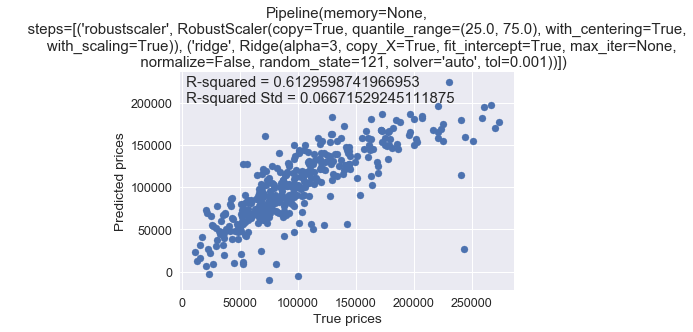


Ridge score: 0.6130 (0.0667) RMS: 32357.17


In [506]:
ridge = make_pipeline(RobustScaler(), Ridge(alpha=3, random_state=121))
score,rmse = rmse_cv(ridge)
print("\nRidge score: {:.4f} ({:.4f})".format(score.mean(), score.std()),'RMS: {:.2f}'.format(rmse.mean()))

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

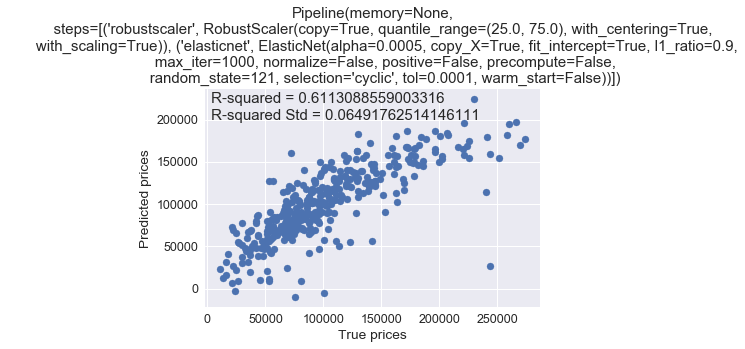


ENet score: 0.6113 (0.0649) RMS: 32397.16


In [508]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=121))
score,rmse = rmse_cv(ENet)
print("\nENet score: {:.4f} ({:.4f})".format(score.mean(), score.std()),'RMS: {:.2f}'.format(rmse.mean()))

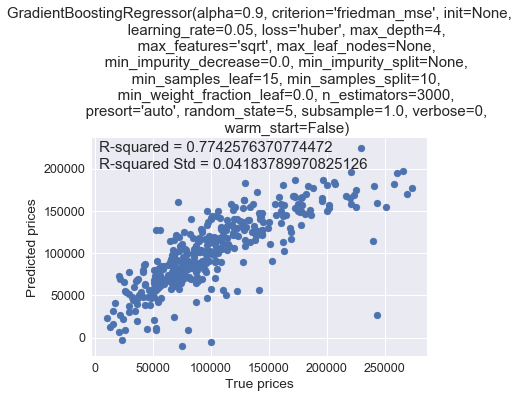


GBoost score: 0.7743 (0.0418) RMS: 25524.25


In [514]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score,rmse = rmse_cv(GBoost)
print("\nGBoost score: {:.4f} ({:.4f})".format(score.mean(), score.std()),'RMS: {:.2f}'.format(rmse.mean()))

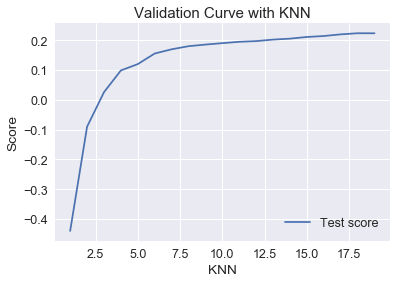

In [521]:
### KNN Regression
# Validation curve over different ranges of N for KNN regression with 10 fold cross-validation

param_range = tuple(list(range(1,20)))
train_scores, test_scores = validation_curve(KNeighborsRegressor(), x, y, param_name="n_neighbors", param_range=param_range,cv=10)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("KNN")
plt.ylabel("Score")
plt.plot(param_range, test_scores_mean, label="Test score",)
plt.legend(loc="best")
plt.show()


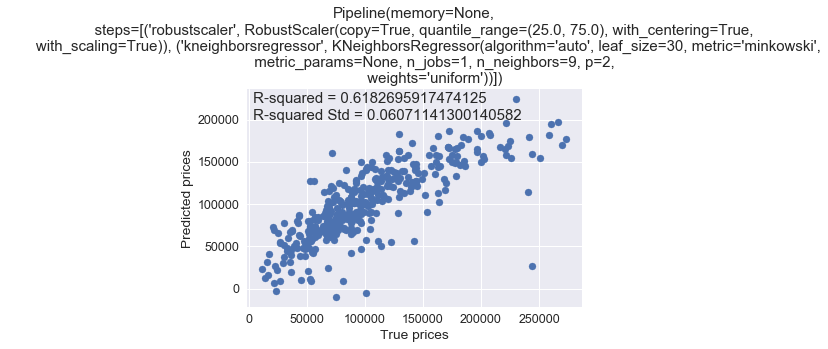


KNN score: 0.6183 (0.0607) RMS: 32464.79


In [535]:
# KNN Regression with the optimal n (n_neighbors = 9)
KNN = make_pipeline(RobustScaler(), KNeighborsRegressor(n_neighbors=9))
score,rmse = rmse_cv(KNN)
print("\nKNN score: {:.4f} ({:.4f})".format(score.mean(), score.std()),'RMS: {:.2f}'.format(rmse.mean()))



In [557]:
### Decision Tree Regression

# GridSearchCV - Decision Tree Regression

tree = DecisionTreeRegressor()
parameters = {"max_depth": range(2,20), "random_state":[121], "min_samples_leaf": range(2,20)}
grid_obj = GridSearchCV(estimator=tree,param_grid=parameters, cv=10, scoring='r2')
grid_fit =grid_obj.fit(x,y)

results = pd.DataFrame(grid_obj.cv_results_)

print(pd.DataFrame(results))
print("best_index", grid_obj.best_index_)
print("best_score", grid_obj.best_score_)
print("best_params", grid_obj.best_params_)


     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.007187      0.000972         0.000699        0.000457   
1         0.006182      0.000399         0.000400        0.000490   
2         0.006184      0.000399         0.000293        0.000448   
3         0.006183      0.000400         0.000399        0.000488   
4         0.006178      0.000403         0.000306        0.000468   
5         0.006280      0.000457         0.000199        0.000398   
6         0.006082      0.000299         0.000300        0.000458   
7         0.005990      0.000020         0.000399        0.000489   
8         0.006376      0.000487         0.000299        0.000457   
9         0.006193      0.000403         0.000701        0.000460   
10        0.006582      0.000495         0.000292        0.000447   
11        0.007479      0.001434         0.000588        0.000653   
12        0.008674      0.001892         0.000710        0.000465   
13        0.006385      0.000494  

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\util

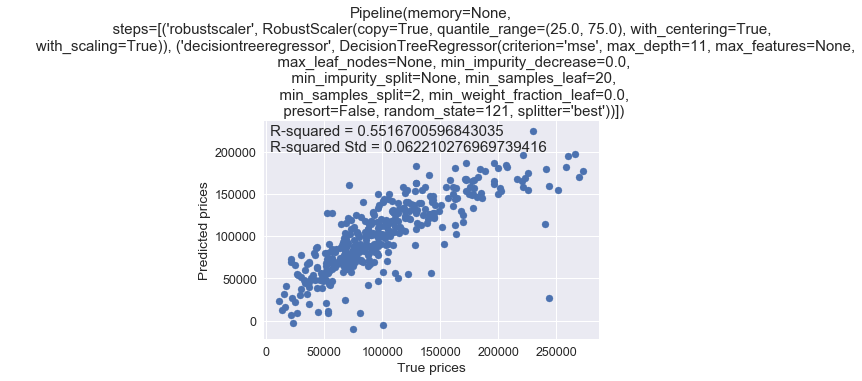


DecitionTreeRegression score: 0.5517 (0.0622) RMS: 35106.81


In [568]:
# Decision Tree Regression with the optimal parameters
tree = make_pipeline(RobustScaler(), DecisionTreeRegressor(max_depth=11, min_samples_leaf=20, random_state=121))
score,rmse = rmse_cv(tree)
print("\nDecitionTreeRegression score: {:.4f} ({:.4f})".format(score.mean(), score.std()),'RMS: {:.2f}'.format(rmse.mean()))

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.004887      0.001040         0.000498    4.984146e-04   
1         0.005484      0.000668         0.000399    4.885490e-04   
2         0.006579      0.000487         0.000599    4.892611e-04   
3         0.008477      0.000499         0.000798    3.990412e-04   
4         0.009873      0.000299         0.000399    4.886945e-04   
5         0.011270      0.000457         0.000698    4.570226e-04   
6         0.013165      0.000599         0.000798    3.990055e-04   
7         0.014760      0.000399         0.000998    3.062542e-07   
8         0.020645      0.003486         0.001196    3.994226e-04   
9         0.020843      0.002016         0.001996    1.093083e-03   
10        0.019149      0.000399         0.000997    4.623108e-07   
11        0.025333      0.002610         0.001495    6.680904e-04   
12        0.022443      0.000662         0.001497    4.986792e-04   
13        0.024036      0.001374  

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\util

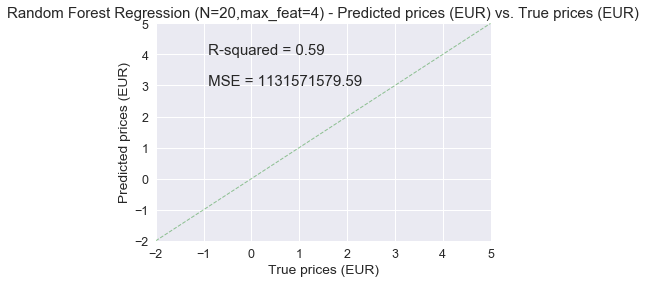

[0.53520619 0.6213285  0.48859857]
0.5483777499502849


In [570]:
### RandomForest Regression

# GridSearchCV - Random Forest Regression

forest = RandomForestRegressor()
parameters = {"n_estimators": range(1,21), "max_features": range(1,10), 'max_depth': [None, 1, 2, 3]}
grid_obj = GridSearchCV(estimator=forest, param_grid=parameters, cv=10, scoring='r2')
grid_obj.fit(x,y)

results = pd.DataFrame(grid_obj.cv_results_)

print(pd.DataFrame(results))
print("best_index", grid_obj.best_index_)
print("best_score", grid_obj.best_score_)
print("best_params", grid_obj.best_params_)

# Random Forest regression along optimal parameters

forest = RandomForestRegressor(n_estimators=20, max_features=4)
forest.fit(x_train, y_train)
predicted_forest = forest.predict(x_test)

plt.scatter(y_test, predicted_forest)
plt.plot([-2, 5], [-2,5], "g--", lw=1, alpha=0.4)
plt.xlabel("True prices (EUR)")
plt.ylabel("Predicted prices (EUR)")
plt.axis([-2,5,-2,5])
plt.text(-1,4, ' R-squared = {}'.format(round(float(forest.score(x_test,y_test)), 2)))
plt.text(-1,3, ' MSE = {}'.format(round(float(mean_squared_error(y_test, predicted_forest)), 2)))
plt.title('Random Forest Regression (N=20,max_feat=4) - Predicted prices (EUR) vs. True prices (EUR)')
plt.show()

# 10 folds cross-validation along the previous Random Forest Regression

forest= RandomForestRegressor(n_estimators=20, max_features=4)
shuffle = KFold(n_splits=3, shuffle=True, random_state=0)
cv_scores = cross_val_score(forest, x, y, cv=shuffle)
print(cv_scores)
print(cv_scores.mean())


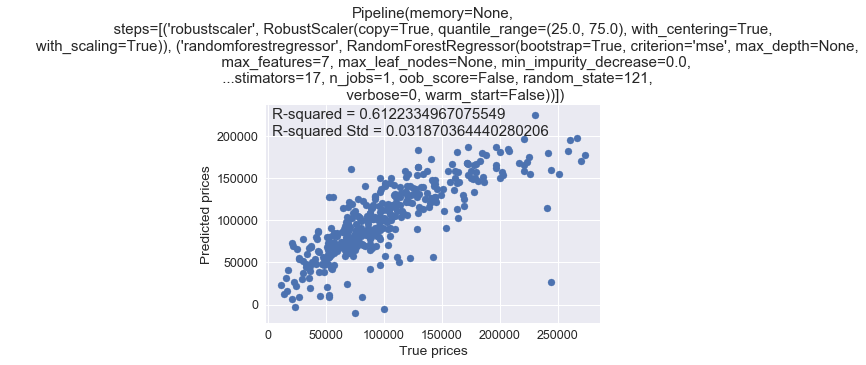


RandomForestRegressor score: 0.6122 (0.0319) RMS: 32307.99


In [583]:
# RandomForestRegressor with the optimal parameters
forest = make_pipeline(RobustScaler(), RandomForestRegressor(n_estimators=17, max_features=7, random_state=121))
score,rmse = rmse_cv(forest)
print("\nRandomForestRegressor score: {:.4f} ({:.4f})".format(score.mean(), score.std()),'RMS: {:.2f}'.format(rmse.mean()))

In [584]:
### Neural Network
### GridSearchCV - Neural Network MLP Regression

parameters = {'alpha': np.linspace(1,50)}
MLP = MLPRegressor(hidden_layer_sizes= [3,3], random_state=0, solver='lbfgs')
grid_obj = GridSearchCV(MLP, parameters, cv=5, scoring='r2')
grid_obj.fit(x, y)

results = pd.DataFrame(grid_obj.cv_results_)

print(pd.DataFrame(results))
print("best_index", grid_obj.best_index_)
print("best_score", grid_obj.best_score_)
print("best_params", grid_obj.best_params_)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.098337      0.017992         0.000797    3.987337e-04           1   
1        0.089560      0.004058         0.000199    3.989220e-04           2   
2        0.088364      0.001621         0.000199    3.989220e-04           3   
3        0.090358      0.002793         0.000598    4.886555e-04           4   
4        0.090358      0.004117         0.000598    4.884999e-04           5   
5        0.091156      0.004213         0.000399    4.888698e-04           6   
6        0.089959      0.002309         0.000399    4.892207e-04           7   
7        0.091355      0.003373         0.000798    3.990652e-04           8   
8        0.113497      0.026578         0.000400    7.993698e-04           9   
9        0.090359      0.001849         0.000399    4.885192e-04          10   
10       0.113696      0.019888         0.000598    4.884225e-04          11   
11       0.102725      0.023593         

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\util

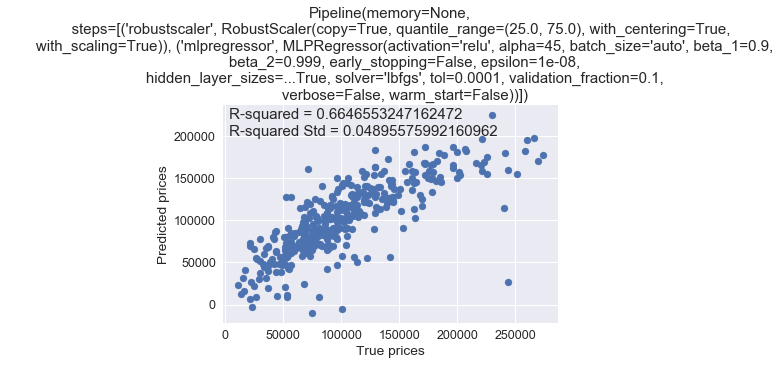


MLPRegressorRegressor score: 0.6647 (0.0490) RMS: 31391.95


In [586]:
# MLPRegressor with the optimal parameters
mlp = make_pipeline(RobustScaler(), MLPRegressor(hidden_layer_sizes= [3,3], alpha=45, solver='lbfgs', random_state=121))
score,rmse = rmse_cv(mlp)
print("\nMLPRegressorRegressor score: {:.4f} ({:.4f})".format(score.mean(), score.std()),'RMS: {:.2f}'.format(rmse.mean()))

In [604]:
# average scores
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

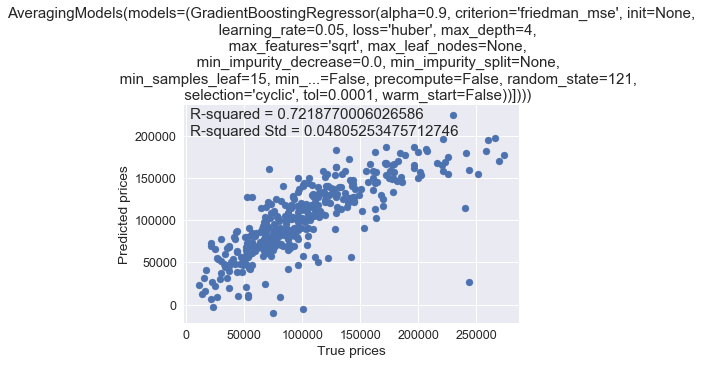


averaged_models score: 0.7219 (0.0481) RMS: 27849.47


In [607]:
# average top 5 models
averaged_models = AveragingModels(models = (GBoost,mlp,KNN,ridge,lasso))

score,rmse = rmse_cv(averaged_models)
print("\naveraged_models score: {:.4f} ({:.4f})".format(score.mean(), score.std()),'RMS: {:.2f}'.format(rmse.mean()))